In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import sklearn
import pickle
import importlib.util

In [2]:
# importing utility file 
spec = importlib.util.spec_from_file_location("Util","/home/user/PycharmProjects/Machine-Learning-Fellowship/week12/utility_class.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
util_obj = foo.Util()

In [3]:
#load and read csv file
data_module= pd.read_csv("USCensus1990.data.txt",nrows=10000)
data_module.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [4]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 69 columns):
caseid       10000 non-null int64
dAge         10000 non-null int64
dAncstry1    10000 non-null int64
dAncstry2    10000 non-null int64
iAvail       10000 non-null int64
iCitizen     10000 non-null int64
iClass       10000 non-null int64
dDepart      10000 non-null int64
iDisabl1     10000 non-null int64
iDisabl2     10000 non-null int64
iEnglish     10000 non-null int64
iFeb55       10000 non-null int64
iFertil      10000 non-null int64
dHispanic    10000 non-null int64
dHour89      10000 non-null int64
dHours       10000 non-null int64
iImmigr      10000 non-null int64
dIncome1     10000 non-null int64
dIncome2     10000 non-null int64
dIncome3     10000 non-null int64
dIncome4     10000 non-null int64
dIncome5     10000 non-null int64
dIncome6     10000 non-null int64
dIncome7     10000 non-null int64
dIncome8     10000 non-null int64
dIndustry    10000 non-null int64
iKorean 

In [5]:
data_module.describe()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14999.50000,3.860400,3.251500,1.608500,0.124900,0.277300,1.227400,1.368800,1.43230,1.46650,...,0.813300,1.467800,0.034200,0.831600,1.002500,1.100600,0.040300,8.466000,1.831700,0.140900
std,2886.89568,2.050398,4.012114,1.777904,0.685089,0.949997,1.750599,1.741002,0.84326,0.84531,...,1.319552,1.953035,0.181752,0.859951,0.684208,0.744402,0.196672,4.098893,2.118826,0.407509
min,10000.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12499.75000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,1.000000,0.000000
50%,14999.50000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.00000,2.00000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000,1.000000,0.000000
75%,17499.25000,6.000000,3.000000,2.000000,0.000000,0.000000,1.000000,3.000000,2.00000,2.00000,...,3.000000,3.000000,0.000000,2.000000,1.000000,2.000000,0.000000,11.000000,2.000000,0.000000
max,19999.00000,7.000000,11.000000,12.000000,4.000000,4.000000,9.000000,5.000000,2.00000,2.00000,...,3.000000,6.000000,1.000000,2.000000,2.000000,2.000000,1.000000,17.000000,7.000000,2.000000


In [6]:
#check null value
data_module.isnull().sum()

caseid       0
dAge         0
dAncstry1    0
dAncstry2    0
iAvail       0
iCitizen     0
iClass       0
dDepart      0
iDisabl1     0
iDisabl2     0
iEnglish     0
iFeb55       0
iFertil      0
dHispanic    0
dHour89      0
dHours       0
iImmigr      0
dIncome1     0
dIncome2     0
dIncome3     0
dIncome4     0
dIncome5     0
dIncome6     0
dIncome7     0
dIncome8     0
dIndustry    0
iKorean      0
iLang1       0
iLooking     0
iMarital     0
            ..
dPoverty     0
dPwgt1       0
iRagechld    0
dRearning    0
iRelat1      0
iRelat2      0
iRemplpar    0
iRiders      0
iRlabor      0
iRownchld    0
dRpincome    0
iRPOB        0
iRrelchld    0
iRspouse     0
iRvetserv    0
iSchool      0
iSept80      0
iSex         0
iSubfam1     0
iSubfam2     0
iTmpabsnt    0
dTravtime    0
iVietnam     0
dWeek89      0
iWork89      0
iWorklwk     0
iWWII        0
iYearsch     0
iYearwrk     0
dYrsserv     0
Length: 69, dtype: int64

In [7]:
#remove duplicate value
data_module.duplicated().sum()

0

In [8]:
x_train= data_module.iloc[:,:10000].values
x_train.shape

(10000, 69)

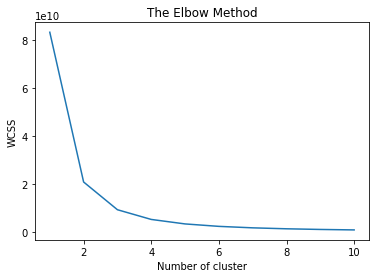

In [9]:
#using the elbow method 
#find the optimal no. of cluster
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x_train)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

pridict value [0 0 0 ... 3 3 3]

visualization of kmeans:


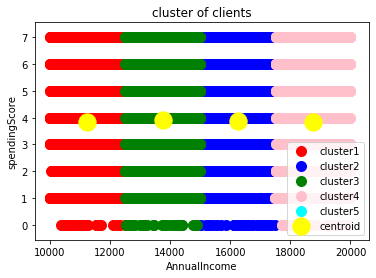

In [10]:
class K_means:
    def k_means_model(self):
        kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
        return kmeans

def main():
    obj=K_means()
    
    kmeans =obj.k_means_model()
    print(kmeans)
    
    y_kmeans= util_obj.predict(x_train,kmeans)
    print("\npridict value",y_kmeans)
    
    print('\nvisualization of kmeans:')
    util_obj.visualizing(x_train,y_kmeans,kmeans)

if __name__ == '__main__':
    main()
 